# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dogubayazit
Processing Record 2 of Set 1 | redencao
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | aginskoye
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | pitimbu
Processing Record 8 of Set 1 | sylhet
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | chonchi
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | zhaotong
Processing Record 18 of Set 1 | selizharovo
Processing Record 19 of Set 1 | buka
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of Set 1 | shizuna

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dogubayazit,39.5469,44.0842,6.60,62,68,1.84,TR,1699588093
1,redencao,-4.2258,-38.7306,24.41,87,98,2.00,BR,1699588094
2,invercargill,-46.4000,168.3500,15.57,54,0,1.34,NZ,1699588094
3,karratha,-20.7377,116.8463,36.68,21,0,6.33,AU,1699588094
4,aginskoye,51.1000,114.5300,-7.95,64,13,5.92,RU,1699588094


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dogubayazit,39.5469,44.0842,6.60,62,68,1.84,TR,1699588093
1,redencao,-4.2258,-38.7306,24.41,87,98,2.00,BR,1699588094
2,invercargill,-46.4000,168.3500,15.57,54,0,1.34,NZ,1699588094
3,karratha,-20.7377,116.8463,36.68,21,0,6.33,AU,1699588094
4,aginskoye,51.1000,114.5300,-7.95,64,13,5.92,RU,1699588094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

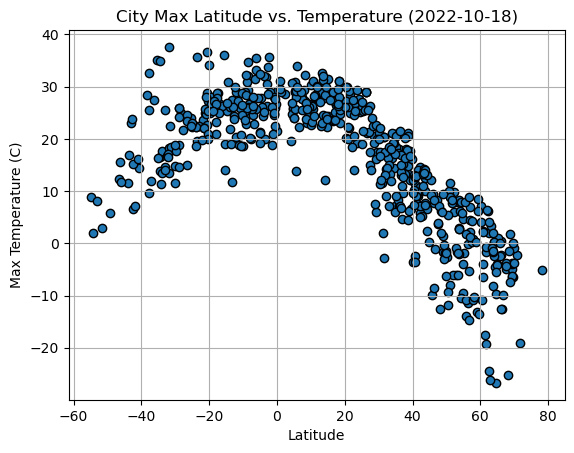

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

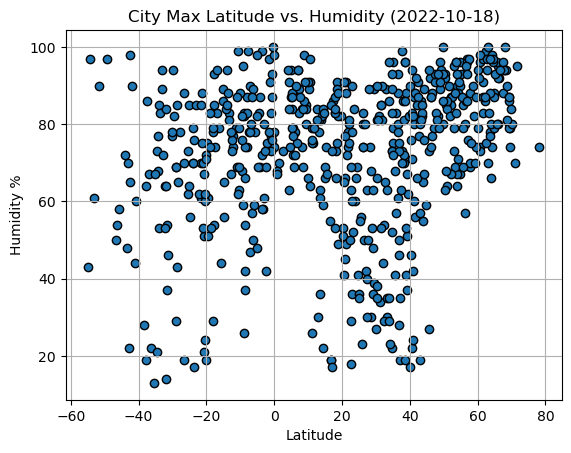

In [53]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

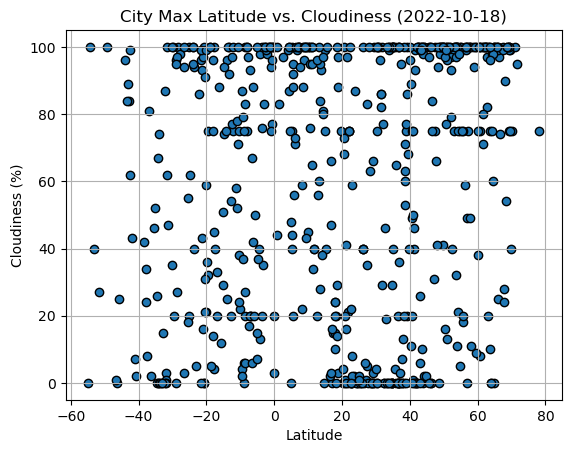

In [55]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

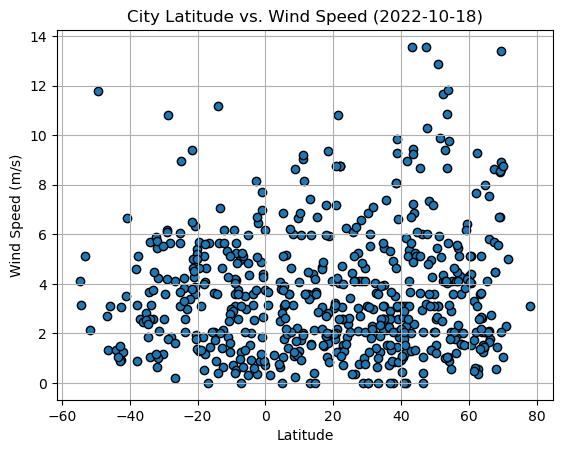

In [57]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values, title, y_label, text_coordinates):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        print(f"The r-value is: {rvalue**2}")
        plt.show()



In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dogubayazit,39.5469,44.0842,6.60,62,68,1.84,TR,1699588093
4,aginskoye,51.1000,114.5300,-7.95,64,13,5.92,RU,1699588094
7,sylhet,24.5000,91.6667,25.14,69,0,2.36,BD,1699588095
10,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,73,100,9.39,RU,1699588096
16,zhaotong,27.3167,103.7167,14.99,63,83,2.09,CN,1699588098


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,redencao,-4.2258,-38.7306,24.41,87,98,2.00,BR,1699588094
2,invercargill,-46.4000,168.3500,15.57,54,0,1.34,NZ,1699588094
3,karratha,-20.7377,116.8463,36.68,21,0,6.33,AU,1699588094
5,waitangi,-43.9535,-176.5597,11.57,72,96,1.34,NZ,1699588095
6,pitimbu,-7.4706,-34.8086,26.33,78,17,4.96,BR,1699588095


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7754970797126541


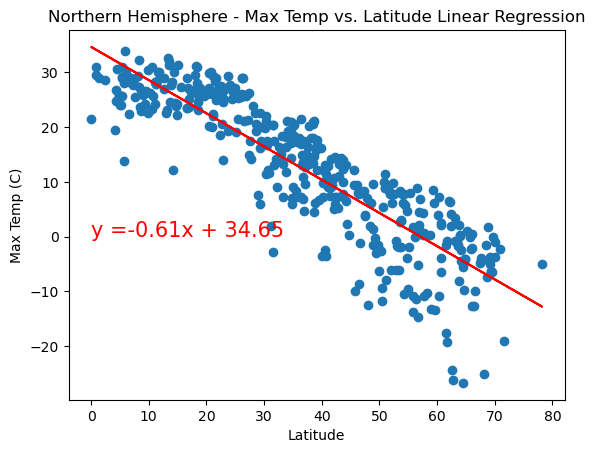

In [75]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
             'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp (C)', (0, 0))


The r-value is: 0.35451581390425957


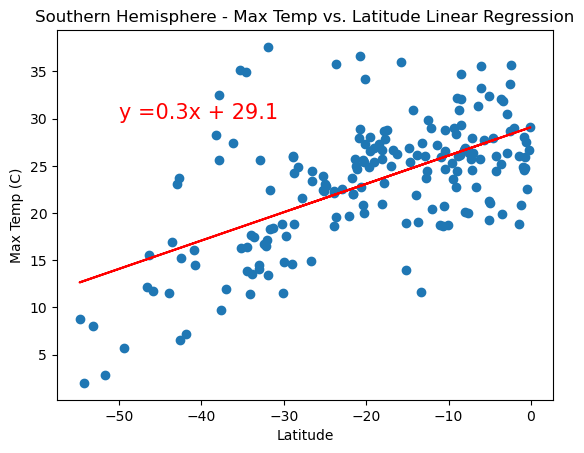

In [78]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
             'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Max Temp (C)', (-50, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06450517506226196


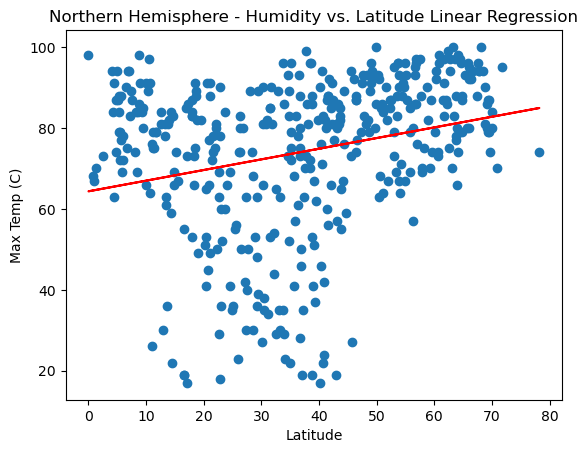

In [80]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
             'Northern Hemisphere - Humidity vs. Latitude Linear Regression', 'Max Temp (C)', (0, 0))

The r-value is: 0.06195696500008669


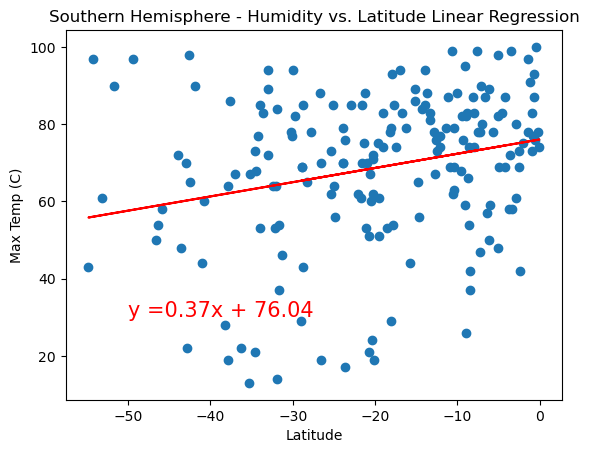

In [84]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
             'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 'Max Temp (C)', (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.027272877338759032


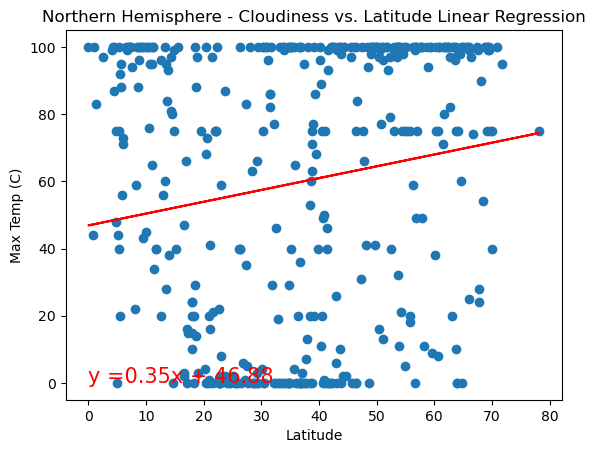

In [85]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
             'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Max Temp (C)', (0, 0))

The r-value is: 0.0375331924939429


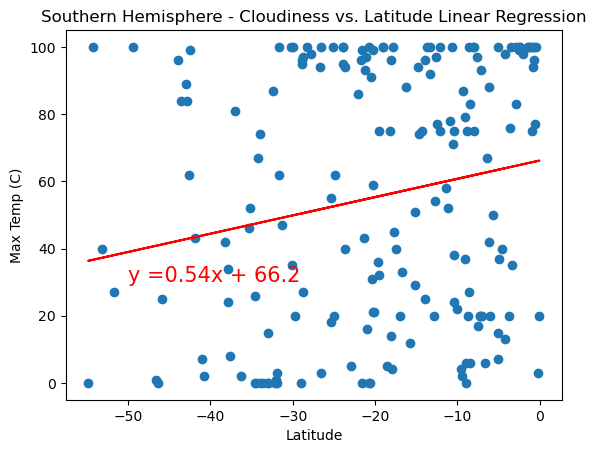

In [86]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
             'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Max Temp (C)', (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01712992843501493


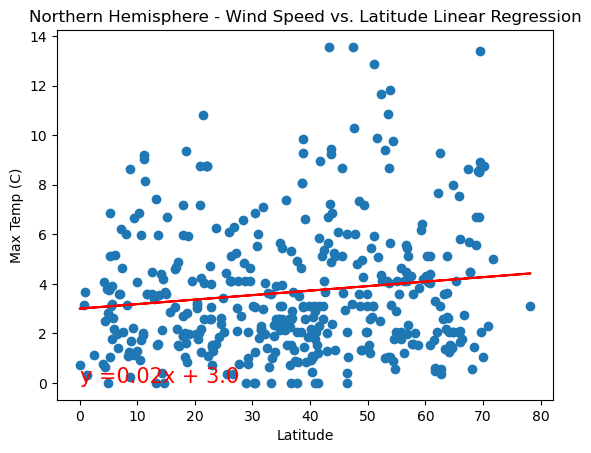

In [87]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
             'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Max Temp (C)', (0, 0))

The r-value is: 1.4267205510116878e-05


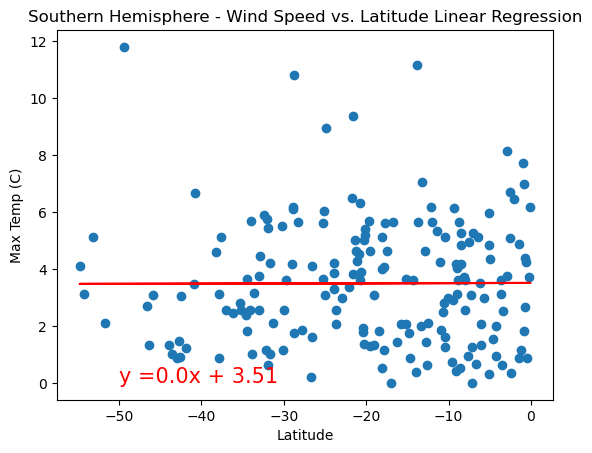

In [91]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
             'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Max Temp (C)', (-50, 0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE